In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import itertools
from numba import njit, prange
from sympy import symbols, sqrt, solve, lambdify
from modules import *

In [3]:
OKABE_ITO = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
PATH = "../paper/"

## Mutant Data Processing

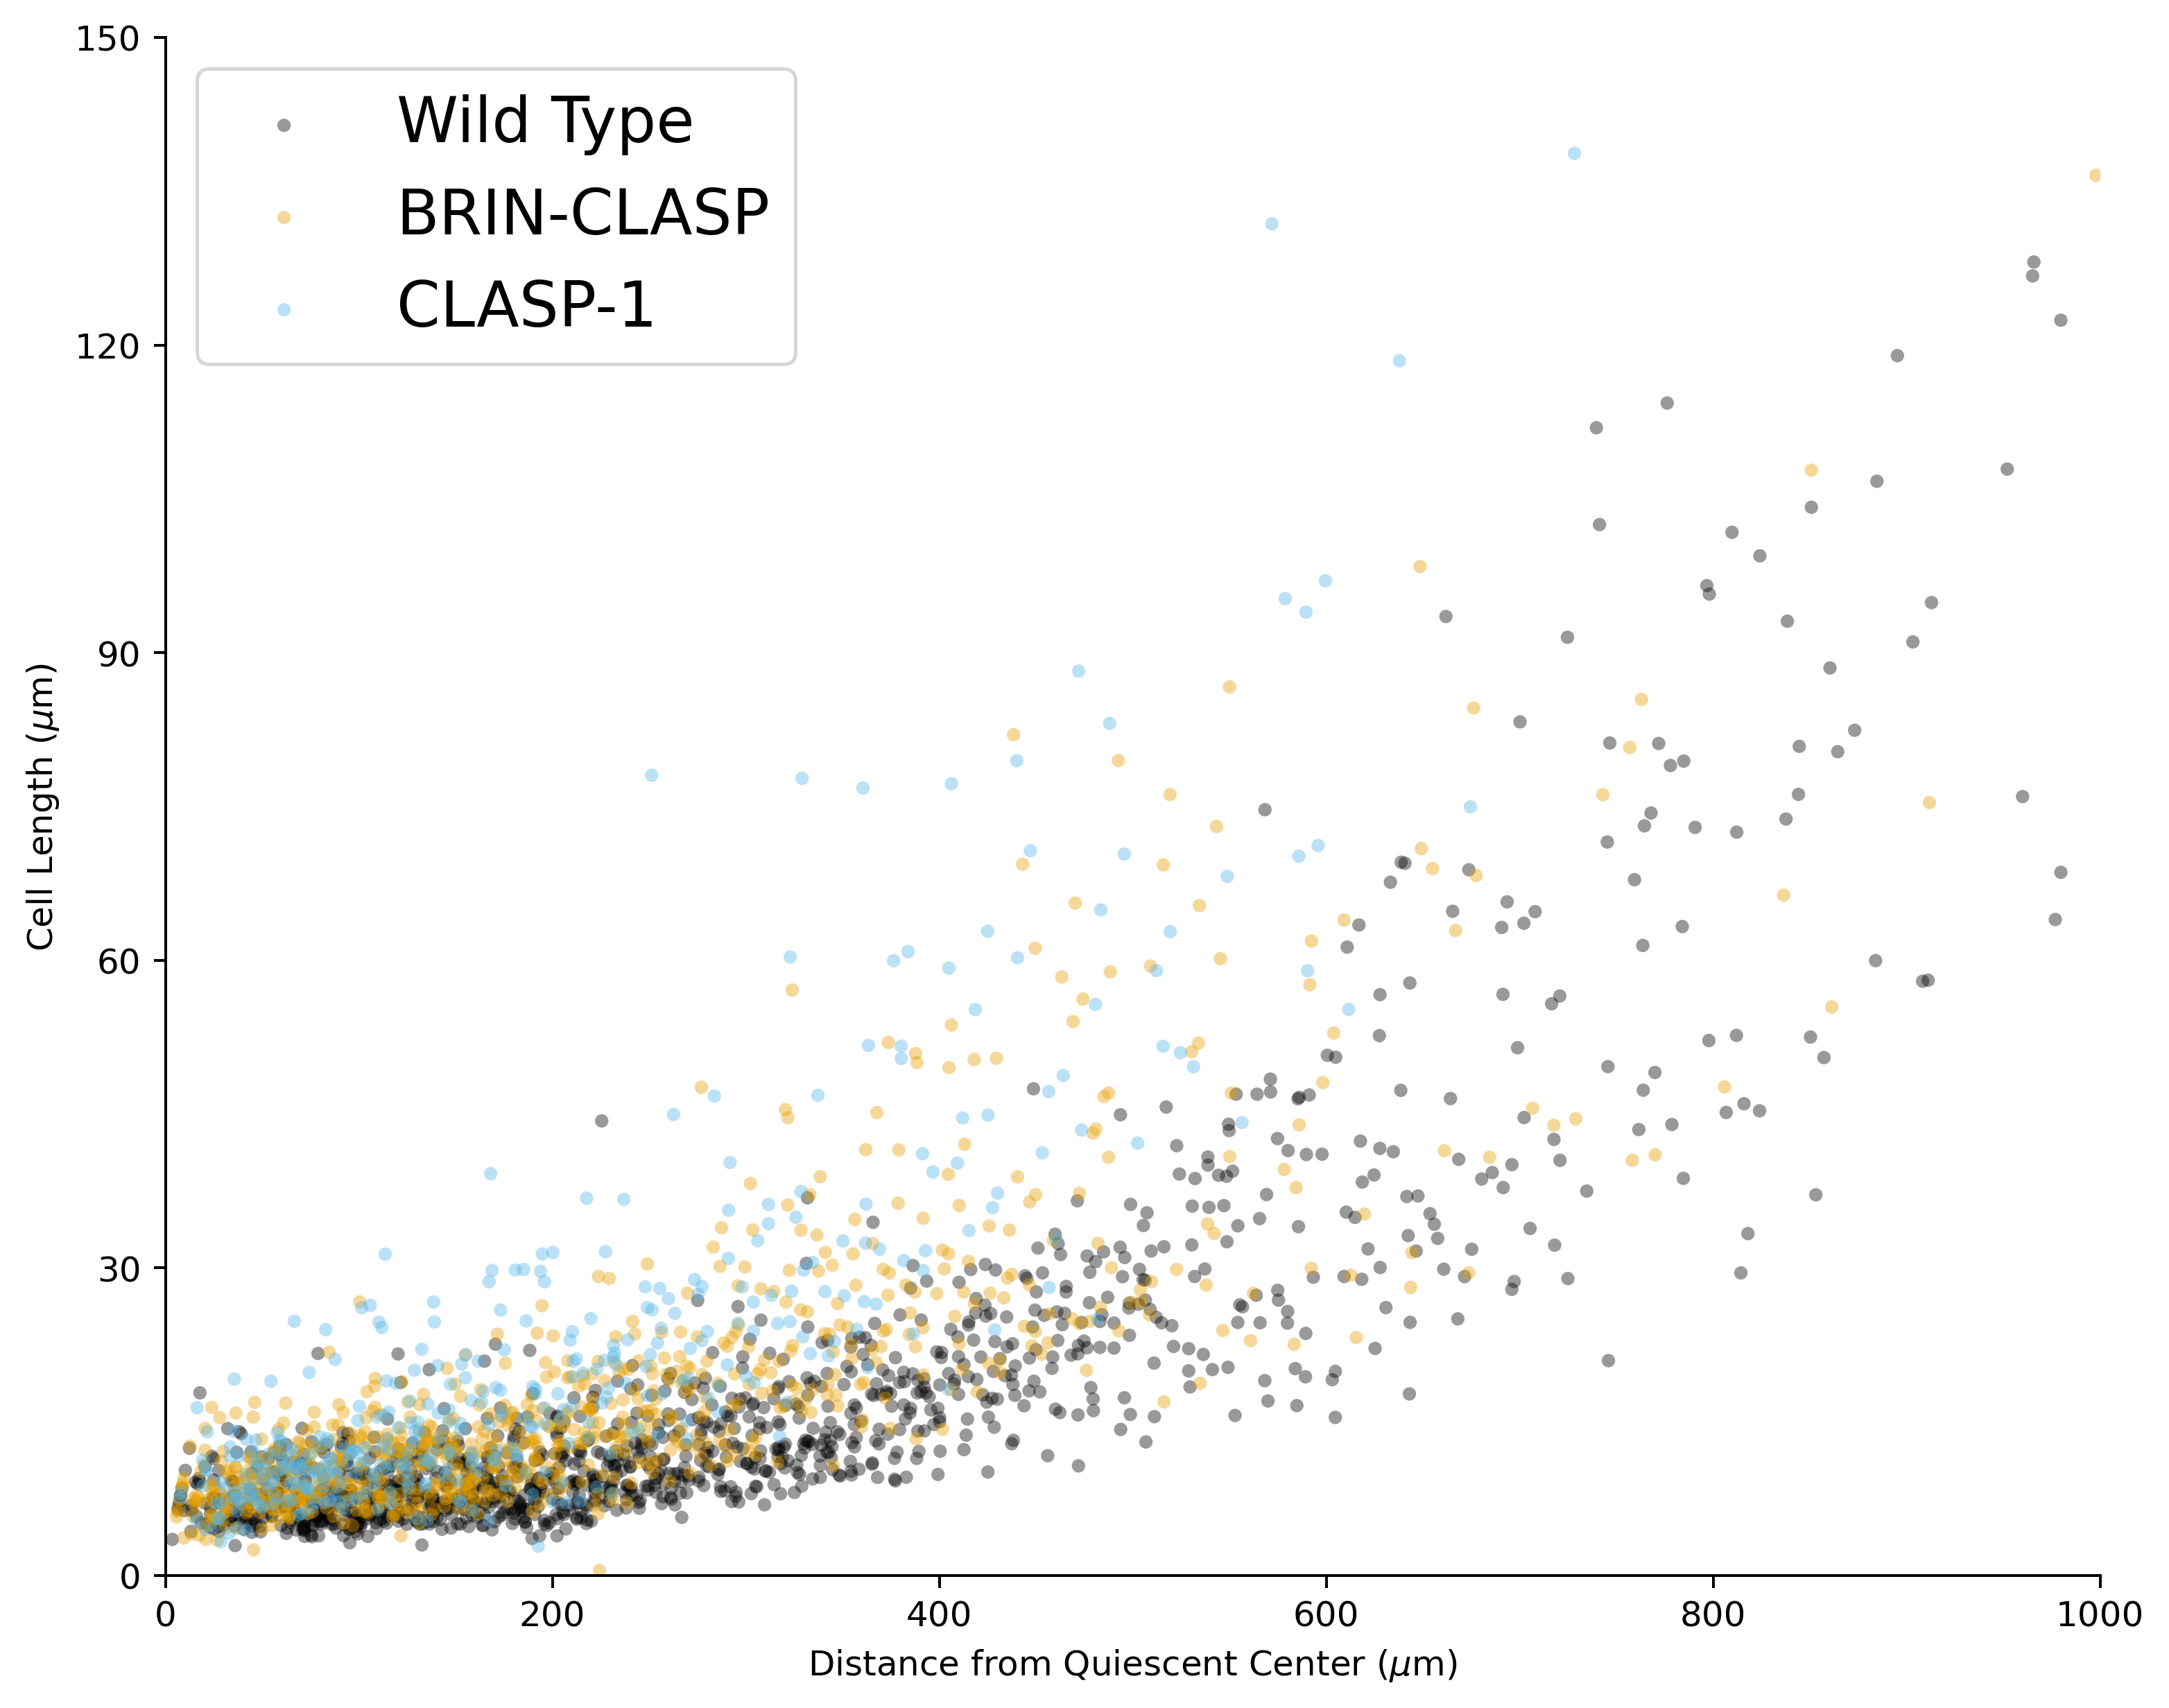

In [4]:
vP = np.linspace(0, 1000, 1001)
plt.rcParams['figure.dpi'] = 360
mpl.rcParams['figure.figsize'] = (10, 8)

# Create the plot
ax = plt.subplot(111)
ax.set_xlabel(r"Distance from Quiescent Center ($\mu$m)")
ax.set_ylabel(r"Cell Length ($\mu$m)")
ax.set_ylim((0, 150))
ax.set_yticks(np.arange(0, 180, 30))
ax.set_xlim((0, 1000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def plot_mutant_data(prefix, label, color):
    data, fit, se = get_mutant_data("trichoblast", prefix, 10, 12)
    vL, ci_low, ci_high = fit(vP / 1000), (1 - 1.96 * se), (1 + 1.96 * se)
    ax.scatter(data[:, 0], data[:, 1], s = 15, alpha = 0.4, color = color, edgecolor = "none", label = label)
    # ax.plot(vP, vL, color = color, label = label, lw = 2)
    # ax.fill_between(vP, vL * ci_low, vL * ci_high, color = color, alpha = 0.4, ec = "none")

prefixes = ["WT-", "BC-", "C1-"]
labels = ["Wild Type", "BRIN-CLASP", "CLASP-1"]
colors = OKABE_ITO[:3]

for p, l, c in zip(prefixes, labels, colors):
    plot_mutant_data(p, l, c)
    
# Configure the display  
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (10, 8)
ax.legend()
plt.savefig(f"{PATH}/data-trichoblast.pdf", format ='pdf')

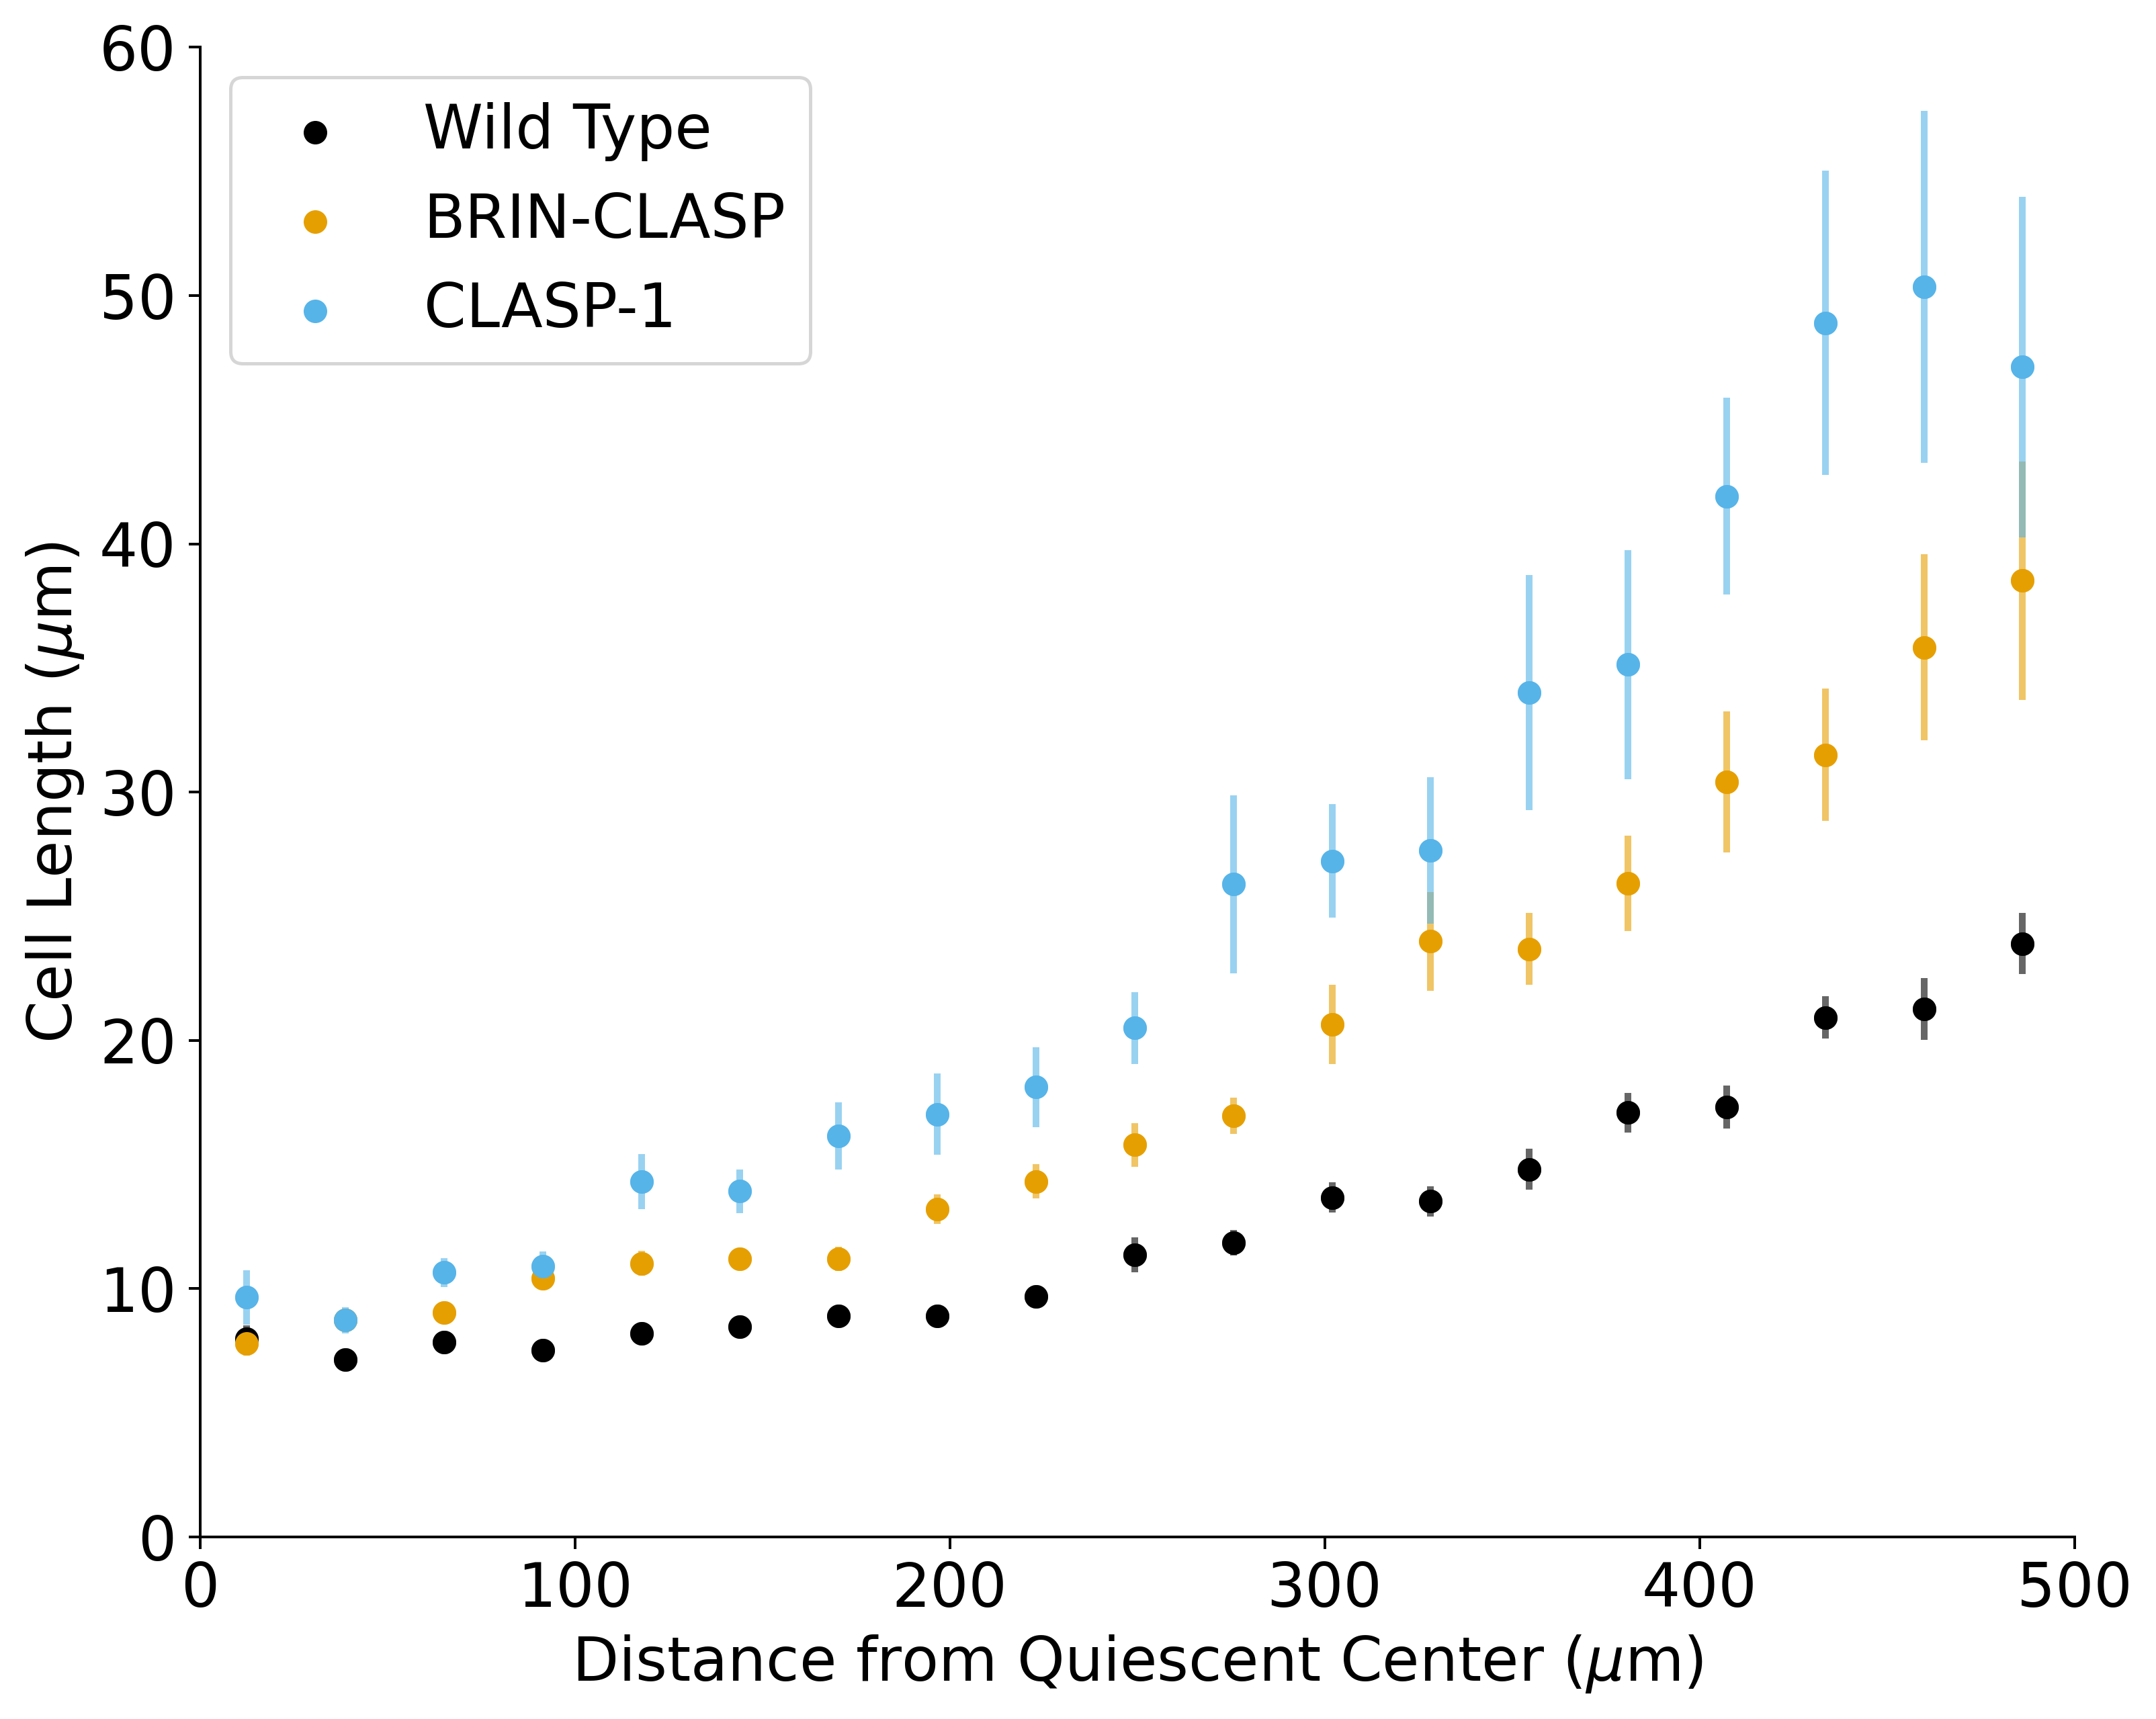

In [17]:
vP = np.linspace(0, 1000, 1001)
plt.rcParams['figure.dpi'] = 360
mpl.rcParams['figure.figsize'] = (10, 8)

# Create the plot
ax = plt.subplot(111)
ax.set_xlabel(r"Distance from Quiescent Center ($\mu$m)")
ax.set_ylabel(r"Cell Length ($\mu$m)")
ax.set_ylim((0, 60))
ax.set_yticks(np.arange(0, 70, 10))
ax.set_xlim((0, 500))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def plot_mutant_data(prefix, label, color, nbins):
    
    data, fit, se = get_mutant_data("trichoblast", prefix, 10, 12)
    
    # Filter data to only include data between 0 and 500um
    data = data[data[:, 0] < 500]

    # Unpack the data and plot the means
    positions, lengths = data[:, 0], data[:, 1]   
    indices = np.digitize(positions, np.linspace(0, 500, nbins + 1))
    means, errors = [], []
    for i in range(nbins):
        group = lengths[indices == i + 1]
        means.append(np.mean(group))
        errors.append((np.std(group) / np.sqrt(group.size)))

    mid, step = 250 / nbins, 500 / nbins
    ps = np.linspace(mid, (step * nbins) + mid, nbins)
    plt.scatter(ps, means, alpha = 1, zorder = 3, color = color, label = label)
    plt.errorbar(ps, means, yerr = errors, color = color, fmt = "o", lw = 2, alpha = 0.6)

prefixes = ["WT-", "BC-", "C1-"]
labels = ["Wild Type", "BRIN-CLASP", "CLASP-1"]
colors = OKABE_ITO[:3]

for p, l, c in zip(prefixes, labels, colors):
    plot_mutant_data(p, l, c, 20)
    
# Configure the display  
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (10, 8)
ax.legend()
plt.savefig(f"{PATH}/data-binned.pdf", format ='pdf')

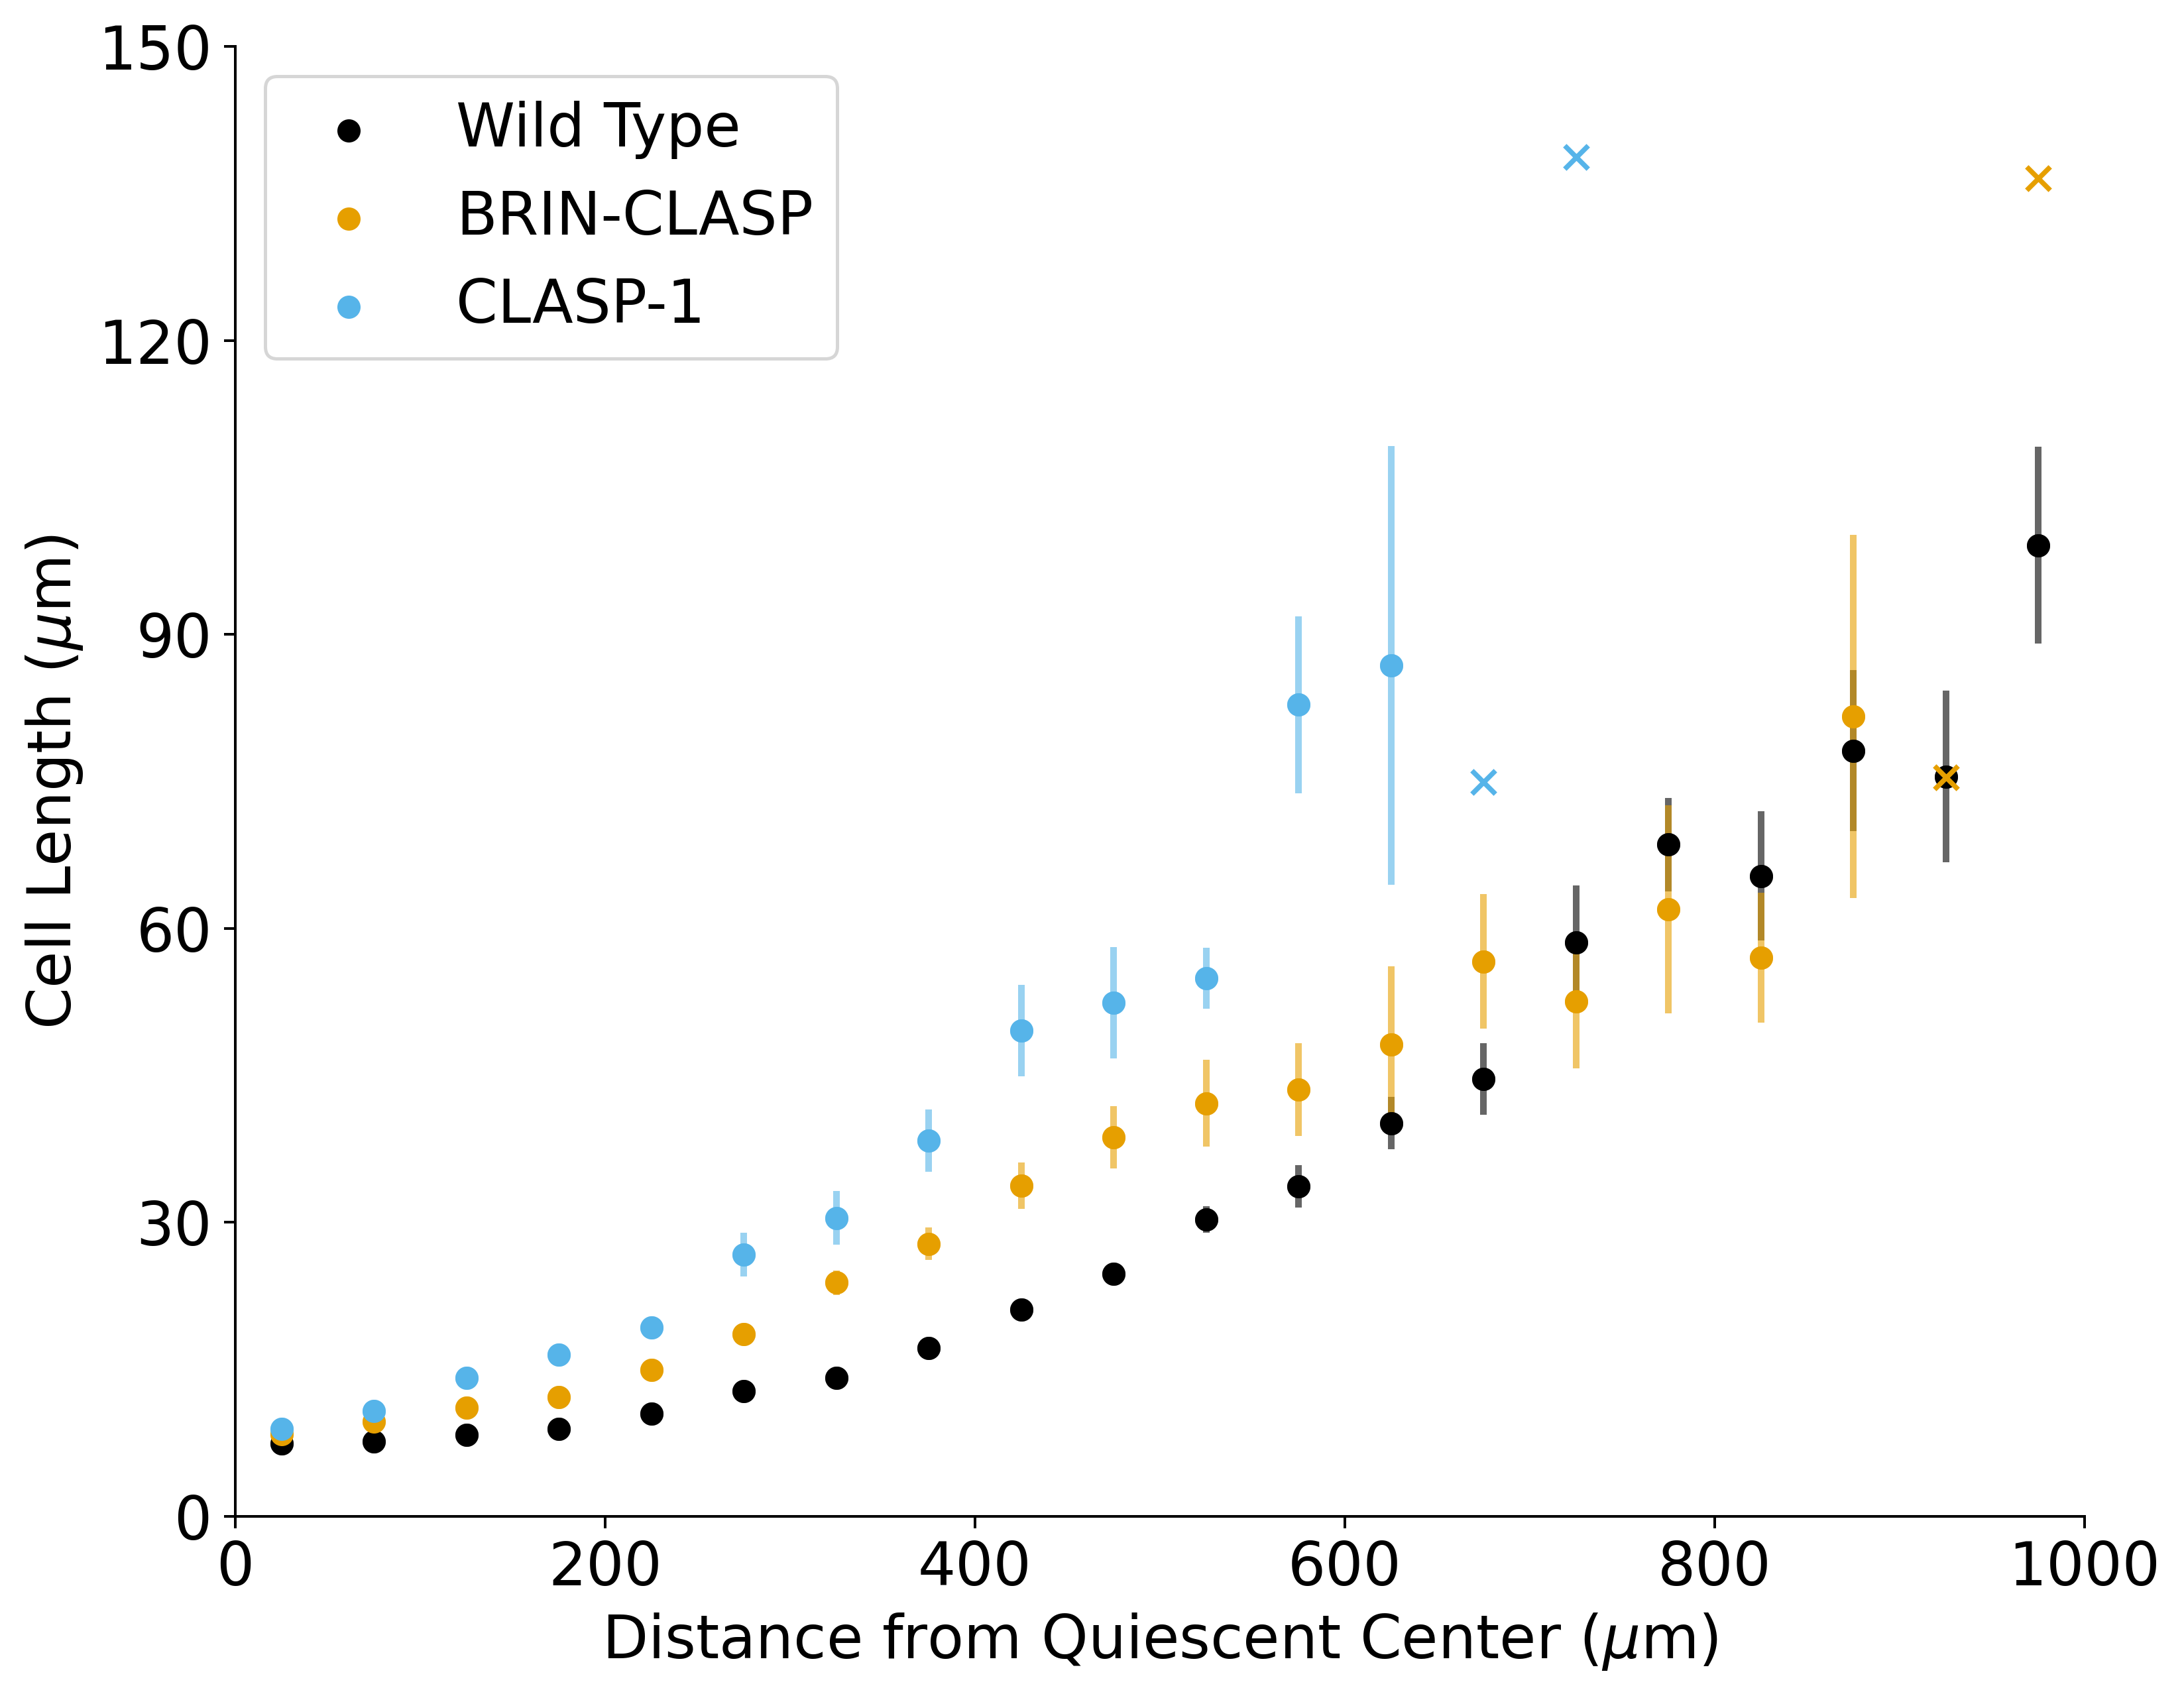

In [9]:
vP = np.linspace(0, 1000, 1001)
plt.rcParams['figure.dpi'] = 360
mpl.rcParams['figure.figsize'] = (10, 8)

# Create the plot
ax = plt.subplot(111)
ax.set_xlabel(r"Distance from Quiescent Center ($\mu$m)")
ax.set_ylabel(r"Cell Length ($\mu$m)")
ax.set_ylim((0, 150))
ax.set_yticks(np.arange(0, 180, 30))
ax.set_xlim((0, 1000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def plot_all_mutant_data(prefix, label, color, nbins):
    
    data, fit, se = get_mutant_data("trichoblast", prefix, 10, 12)
    positions, lengths = data[:, 0], data[:, 1]
    
    indices = np.digitize(positions, np.linspace(0, 1000, nbins + 1))
    mid, step = 500 / nbins, 1000 / nbins
    for i in range(nbins):
        
        group = lengths[indices == i + 1]
        loc = mid + (step * i)
        
        if group.size == 0: 
            break

        if group.size == 1:
            plt.scatter(loc, group, marker = "x", s=50, alpha = 1, zorder = 3, color = color)
            continue

        mean = np.mean(group)
        err = (np.std(group) / np.sqrt(group.size))
        plt.scatter(loc, mean, alpha = 1, zorder = 3, color = color, label = label if i == 0 else None)
        plt.errorbar(loc, mean, yerr = err, color = color, fmt = "o", lw = 2, alpha = 0.6)

prefixes = ["WT-", "BC-", "C1-"]
labels = ["Wild Type", "BRIN-CLASP", "CLASP-1"]
colors = OKABE_ITO[:3]

for p, l, c in zip(prefixes, labels, colors):
    plot_all_mutant_data(p, l, c, 20)
    
# Configure the display  
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (10, 8)
ax.legend()
plt.savefig(f"{PATH}/all-data-binned.pdf", format ='pdf')